In [3]:
import numpy as np
from tqdm import tqdm

import torch
import pandas
from transformers import AutoTokenizer, AutoModel

from transformers import DistilBertModel, DistilBertTokenizer

# Load pre-trained model and tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
PAD = 26

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [6]:
df = pandas.read_json("/kaggle/input/nlpaa4/train_file.json")
df_val = pandas.read_json("/kaggle/input/nlpaa4/val_file.json")
df_test = pandas.read_json("/kaggle/input/nlpaa4/val_file.json")
TEST = True
torch.cuda.empty_cache()
import gc
def speaker_prep(lis):
    f = dict()
    ret = [0]*PAD
    for i in range(len(lis)):
        if lis[i] not in f.keys():
            f[lis[i]] = len(f) + 1
        ret[PAD - len(lis) +i] = f[ lis[i]]
    return ret
     
def emo_prep(l):
    f = {
        "surprise": 1,
        "fear": 2,
        "sadness":3,
        "disgust": 4,
        "joy": 5,
        "neutral": 6,
        "anger":7
    }
    ret = [0]*PAD
    for i in range(len(l)):
        ret[PAD-len(l) + i] = f[l[i]]
    return ret

def trigger_prep(r):
    s = PAD - len(r)
    ret = [0]*s
    for i in r:
        if i == None:
            return None
        ret.append(i)
    fin = []
    return ret

tqdm.pandas(desc="kefo")
df["speakers"] = df["speakers"].progress_apply(lambda r: speaker_prep(r))
df["emotions"] = df["emotions"].progress_apply(lambda r: emo_prep(r))
df["triggers"] = df["triggers"].progress_apply(lambda r: trigger_prep(r))
# df["utterances"] = df["utterances"].progress_apply(lambda r: golo(r))

df_val["speakers"] = df_val["speakers"].progress_apply(lambda r: speaker_prep(r))
df_val["emotions"] = df_val["emotions"].progress_apply(lambda r: emo_prep(r))
df_val["triggers"] = df_val["triggers"].progress_apply(lambda r: trigger_prep(r))
# df["utterances"] = df["utterances"].progress_apply(lambda r: golo(r))
if TEST:
    df_test["speakers"] = df_test["speakers"].progress_apply(lambda r: speaker_prep(r))
    df_test["emotions"] = df_test["emotions"].progress_apply(lambda r: emo_prep(r))
    df_test["triggers"] = df_test["triggers"].progress_apply(lambda r: trigger_prep(r))
    

kefo: 100%|██████████| 843/843 [00:00<00:00, 195845.70it/s]


In [7]:
df = df.dropna().drop(["episode"],axis=1)
df_val = df_val.dropna().drop(["episode"],axis=1)
if TEST:
    df_test = df_test.dropna().drop(["episode"],axis=1)

In [57]:
df

,speakers,emotions,utterances,triggers
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[You-you you had sex with Ursula?!, Uh, a litt...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 7, 3, ...","[Dad, please don't pick your teeth out here!, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0...."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Dr. Geller, there's a seat over here., Thank ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[So, how'd the lasagne go over?, Really?!, Good.]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Become a drama critic!, I am hurt! A plague ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
6735,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[I mean, I realize that his feelings may never...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6736,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Okay. Just give us a second. Ross!, Yeah?, Gi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6737,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Did you just flick me?, OK, well, you wouldn'...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6738,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Oh!, Look at Emma!, I just cant decide who s...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
import torch
from torch.utils.data import Dataset
import pandas as pd
chache = []
class CDataset(Dataset):
    def __init__(self, data) -> None:
        data = data
        self.speaker = data["speakers"]
        self.emotions = data["emotions"]
        self.utterances = data["utterances"]
        self.triggers = data["triggers"]
    
    def __len__(self):
        return len(self.speaker)
    
    def __getitem__(self,idx):
        global chache
        torch.cuda.empty_cache()
        r = self.utterances.iloc[idx]
        s = PAD - len(r)
        ret = [""]*s
        ret.extend(r)
        encoded_input = tokenizer(ret, padding='max_length',truncation=True, max_length=30, return_tensors='pt').to(device)
#         print("ei")
  
        with torch.no_grad():
            output = bert_model(**encoded_input)
#             print("eo")
        cls_token_representation = output.last_hidden_state[:, 0, :]
#         print("cls")

        del output
        del chache
        chache = [self.speaker.iloc[idx], \
            self.emotions.iloc[idx], \
            cls_token_representation, \
            self.triggers.iloc[idx]
                 ]
        return torch.tensor(self.speaker.iloc[idx],dtype=torch.float32).to(device), \
            torch.tensor(self.emotions.iloc[idx],dtype=torch.float32).to(device), \
            cls_token_representation, \
            torch.tensor(self.triggers.iloc[idx],dtype=torch.float32).to(device)

In [9]:
from torch.utils.data import DataLoader
BATCH_SIZE = 64

train_dataloader = DataLoader(CDataset(df), batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(CDataset(df_val), batch_size=BATCH_SIZE, shuffle=True)
if TEST:
    test_dataloader = DataLoader(CDataset(df_test), batch_size=BATCH_SIZE, shuffle=True)

In [10]:
import os
import torch
from torch import nn
import torch.nn.functional as F
class EFR_Model(nn.Module):
    def __init__(self):
        super(EFR_Model, self).__init__()
        self.hidden_size  = 200
        self.num_layers = 3
        
        self.gru_speech = nn.LSTM(768*2 + 200, self.hidden_size, self.num_layers, batch_first=True,bidirectional=True,dropout=0.3)
        self.gru_emo = nn.LSTM(1, self.hidden_size, 1, batch_first=True)
        self.fc1 = nn.Linear(2*self.hidden_size + 768,1)
        self.softmax = nn.Tanh()
        
    def forward(self, x):
        speech_augmentation = x[2][:,-1,:]
        new_d = torch.cat((x[2],torch.stack([speech_augmentation]*x[2].shape[1],dim=1)),dim=2)
        out3,_ = self.gru_emo(torch.reshape(x[1],(x[1].shape[0],x[1].shape[1],1)))
        out1,_ = self.gru_speech(torch.cat((new_d,out3),dim=2))
        out =self.softmax(self.fc1(F.relu(torch.cat((out1,torch.stack([speech_augmentation]*x[2].shape[1],dim=1)),dim=2))))
        return out
        

In [12]:
model = EFR_Model().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
!pip install torcheval


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 2.0 MB/s eta 0:00:00a 0:00:01m


In [41]:
#training
from torcheval.metrics.functional import binary_f1_score, binary_accuracy
import numpy as np
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    losses = 0
    f1 = 0
    a  = 0
    for x in tqdm(dataloader):
        # Compute prediction and loss
        pred = model(x)
        true = x[3].to(device)

        true = torch.reshape(true,(true.shape[0],true.shape[1],1))
        loss = loss_fn(pred,true)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        X = torch.flatten(pred)
        Y = torch.flatten(true)
        f1 +=  binary_f1_score(X,Y).cpu() * true.shape[0]
        a +=  binary_accuracy(X,Y).cpu() * true.shape[0]
        losses += loss.item() * true.shape[0]
    return losses/size, f1/size, a/size
    

    
def validation_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
#     print(size)
    model.eval()
    losses = 0
    f1 = 0
    a = 0
    for x in tqdm(dataloader):
        # Compute prediction and loss
        with torch.no_grad():
            pred = model(x)
            true= x[3].to(device)
            true = torch.reshape(true,(true.shape[0],true.shape[1],1))
            loss = loss_fn(pred,true)
            X = torch.flatten(pred)
            Y = torch.flatten(true)
            f1 +=  binary_f1_score(X,Y).cpu() * true.shape[0]
            a +=  binary_accuracy(X,Y).cpu() * true.shape[0]
            
        losses+= loss.item() * true.shape[0]
    return losses/size, f1/size, a/size

def test_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.eval()
    losses = 0
    f1 = 0
    a = 0
    pred = []
    true = []
    for x in tqdm(dataloader):
        with torch.no_grad():
            pred.append(np.array(model(x).cpu() > 0.5, dtype=int))
            tr = x[3].to(device)
            true.append(np.array(torch.reshape(tr,(tr.shape[0],tr.shape[1],1)).cpu()))
    return pred, true


In [223]:
PATH = "/kaggle/working/m3.pt"
t_loss = []
v_loss = []
t_f = []
v_f = []
t_a = []
v_a = []
m_t = 9999
v_t = 9999
for t in range(10):
    print(f"Epoch {t+1}\n-------------------------------")
    l, f,a = train_loop(train_dataloader, model, loss_fn, optimizer)
    t_loss.append(l)
    t_f.append(f)
    t_a.append(a)
    l, f,a = validation_loop(val_dataloader, model, loss_fn, optimizer)
    v_loss.append(l)
    v_f.append(f)
    v_a.append(a)
    print(f"training loss: {t_loss[-1]}, val loss: {v_loss[-1]}, training f1: {t_f[-1]}, val f1: {v_f[-1]}, , training acc: {t_a[-1]}, val acc: {v_a[-1]}")
    if v_loss[-1] < v_t:
        v_t = v_loss[-1]
        torch.save(model.state_dict(), PATH)
    if t_loss[-1] < m_t:
        m_t = t_loss[-1]
        torch.save(model.state_dict(), "/kaggle/working/m4.pt")

Epoch 1
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.53s/it]


training loss: 2.9200678063679804, val loss: 2.712405725514363, training f1: 0.538854718208313, val f1: 0.5753128528594971, , training acc: 0.9247410893440247, val acc: 0.9415512084960938
Epoch 2
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.53s/it]


training loss: 2.9026824625008167, val loss: 2.7248363654008214, training f1: 0.5459826588630676, val f1: 0.5772296786308289, , training acc: 0.9254616498947144, val acc: 0.9430181980133057
Epoch 3
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.8959290501973887, val loss: 2.7072803249518267, training f1: 0.5464253425598145, val f1: 0.5042501091957092, , training acc: 0.9250903129577637, val acc: 0.9112038016319275
Epoch 4
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.53s/it]


training loss: 2.890862577183096, val loss: 2.6865031847084238, training f1: 0.5432320833206177, val f1: 0.5394789576530457, , training acc: 0.9235458970069885, val acc: 0.9262859225273132
Epoch 5
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.89275622080693, val loss: 2.736430555191313, training f1: 0.5403918623924255, val f1: 0.46569016575813293, , training acc: 0.9221618175506592, val acc: 0.8938754796981812
Epoch 6
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.8880009663060697, val loss: 2.7156944461033654, training f1: 0.5499622225761414, val f1: 0.4857414960861206, , training acc: 0.9253817796707153, val acc: 0.9032272696495056
Epoch 7
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.882052417138252, val loss: 2.692437065656478, training f1: 0.5537297129631042, val f1: 0.5234032869338989, , training acc: 0.926874577999115, val acc: 0.9197762608528137
Epoch 8
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.878563326832087, val loss: 2.700313705369315, training f1: 0.5506872534751892, val f1: 0.5162356495857239, , training acc: 0.9261021614074707, val acc: 0.9161548018455505
Epoch 9
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.87273506497805, val loss: 2.710557451407304, training f1: 0.5518543124198914, val f1: 0.4902912378311157, , training acc: 0.9256507158279419, val acc: 0.9043733477592468
Epoch 10
-------------------------------


100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


training loss: 2.8651208701009643, val loss: 2.6888901619007535, training f1: 0.5567994117736816, val f1: 0.5729302167892456, , training acc: 0.9268457889556885, val acc: 0.9386633038520813


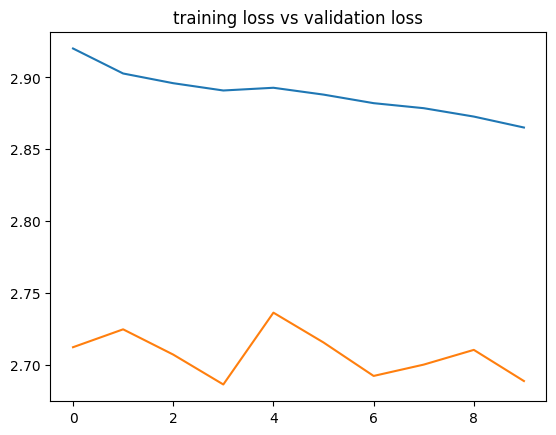

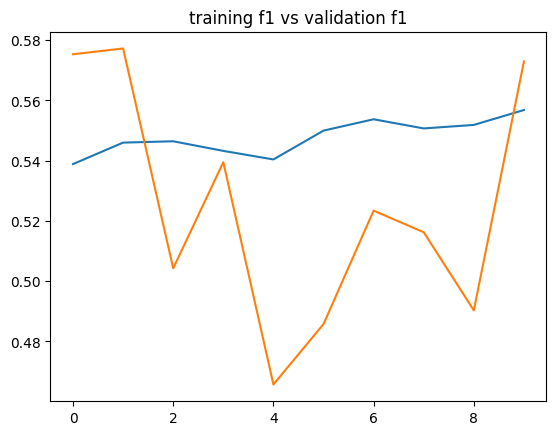

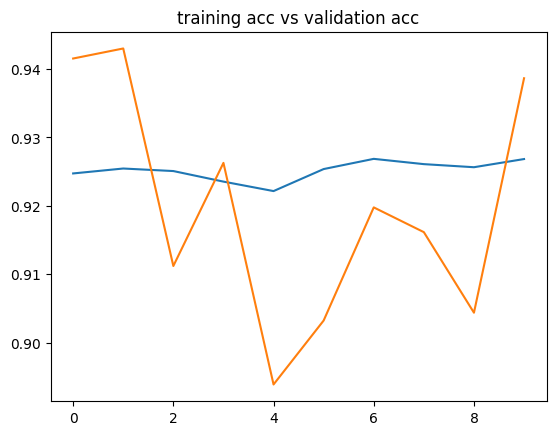

In [224]:
import matplotlib.pyplot as plt
plt.plot(t_loss)
plt.plot(v_loss)
plt.title("training loss vs validation loss")
plt.show()
plt.plot(t_f)
plt.plot(v_f)
plt.title("training f1 vs validation f1")
plt.show()
plt.plot(t_a)
plt.plot(v_a)
plt.title("training acc vs validation acc")
plt.show()

In [13]:
PATH = "/kaggle/input/m1/pytorch/v1/2/m4.pt"
model.load_state_dict(torch.load(PATH))
model.eval()

EFR_Model(
  (gru_speech): LSTM(1736, 200, num_layers=3, batch_first=True, dropout=0.3, bidirectional=True)
  (gru_emo): LSTM(1, 200, batch_first=True)
  (fc1): Linear(in_features=1168, out_features=1, bias=True)
  (softmax): Tanh()
)

In [42]:
c,v = test_loop(test_dataloader, model, loss_fn, optimizer)
print(c[0],v[0])

100%|██████████| 14/14 [00:22<00:00,  1.59s/it]


[array([[[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]]), array([[[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       [[0],
        [0],
        [0],
   

In [43]:
# import json
# f = open("/kaggle/working/test.json","w")
# json.dump({"pred": c,"true":v},f)